# NBA Spread Size Analysis

This notebook analyzes how teams perform against the spread based on different spread sizes (0 to 25 points).

## Key Questions:
- How do cover rates vary by spread size?
- Are certain spread ranges more predictable than others?
- Do favorites or underdogs cover more at different spread sizes?
- What is the distribution of spread sizes in NBA games?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Get the data file path
project_root = Path().resolve().parent
data_file = project_root / 'data' / 'results' / 'nba_season_results.xlsx'

# Load the data
df = pd.read_excel(data_file)

# Filter to only games with scores (completed games)
df_completed = df[df['home_score'].notna() & df['away_score'].notna()].copy()

print(f"Total games loaded: {len(df)}")
print(f"Completed games with scores: {len(df_completed)}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df_completed.head()


Total games loaded: 329
Completed games with scores: 329

Columns: ['game_date', 'home_team', 'away_team', 'closing_spread', 'home_score', 'away_score', 'spread_result_difference']

First few rows:


/Users/robertbatchelor/Library/Python/3.12/lib/python/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  from scipy.stats import gaussian_kde
/Users/robertbatchelor/Library/Python/3.12/lib/python/site-packages/seaborn/_stats/density.py:10: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  from scipy.stats import gaussian_kde
/Users/robertbatchelor/Library/Python/3.12/lib/python/site-packages/seaborn/matrix.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.5)
  from scipy.cluster import hierarchy


,game_date,home_team,away_team,closing_spread,home_score,away_score,spread_result_difference
0,2025-10-21,Oklahoma City Thunder,Houston Rockets,-6.5,125,124,-5.5
1,2025-10-21,Los Angeles Lakers,Golden State Warriors,2.5,109,119,-7.5
2,2025-10-22,Utah Jazz,Los Angeles Clippers,10.5,129,108,31.5
3,2025-10-22,Charlotte Hornets,Brooklyn Nets,-6.5,136,117,12.5
4,2025-10-22,Phoenix Suns,Sacramento Kings,-3.5,120,116,0.5


Spread Size Statistics:
Min spread: -18.5
Max spread: 18.5
Mean spread: -1.8
Median spread: -2.5
Std deviation: 7.6

Spread Size Distribution (rounded to nearest integer):
spread_rounded
-18     1
-16     9
-14     9
-13     2
-12    16
-11     3
-10    25
-8     30
-6     29
-5      1
-4     32
-3      2
-2     31
-1      1
 1      2
 2     33
 3      2
 4     37
 5      3
 6     15
 8     15
 9      2
 10    15
 12    11
 14     1
 18     2
Name: count, dtype: int64


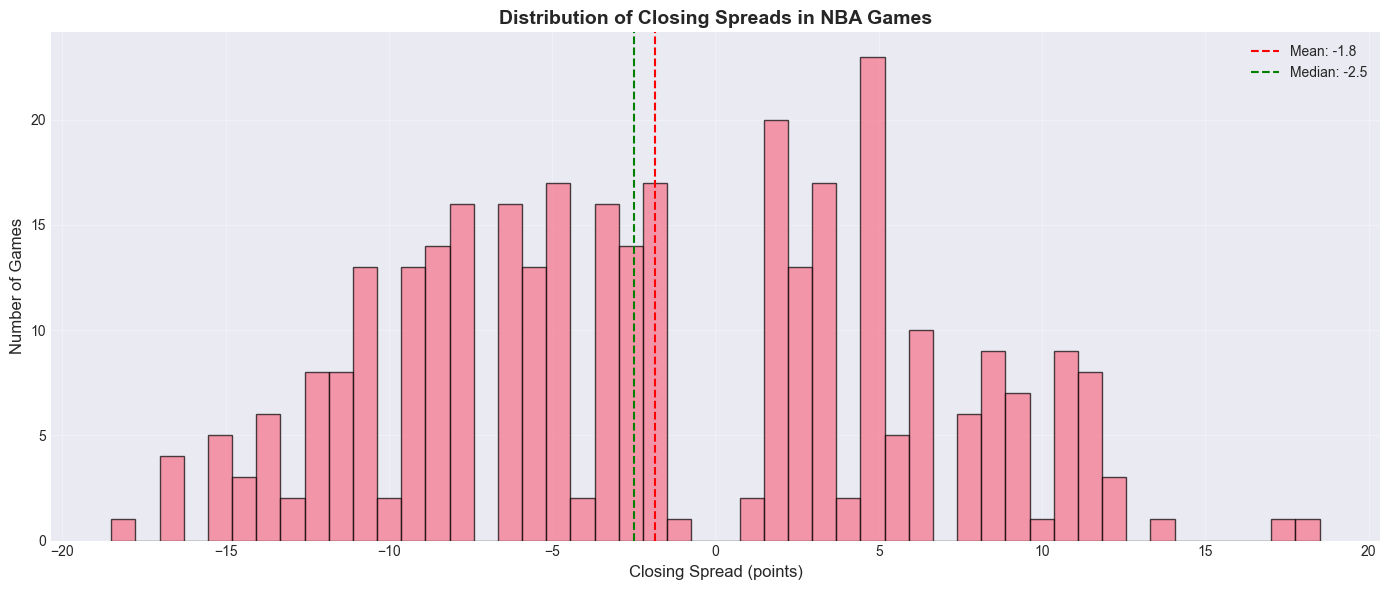

Cover/Push/No Cover Breakdown:
Favorite Covered: 156 games (47.4%)
Favorite Did Not Cover: 173 games (52.6%)
Pushes: 3 games (0.9%)


Cover Rate by Spread Size Category:
                 Total Games  Covered  Did Not Cover  Cover Rate %
spread_category                                                   
1-3 points                71       31             40          43.7
10-12 points              59       26             33          44.1
13-15 points              23       13             10          56.5
16-20 points              12        7              5          58.3
4-6 points                95       45             50          47.4
7-9 points                69       34             35          49.3


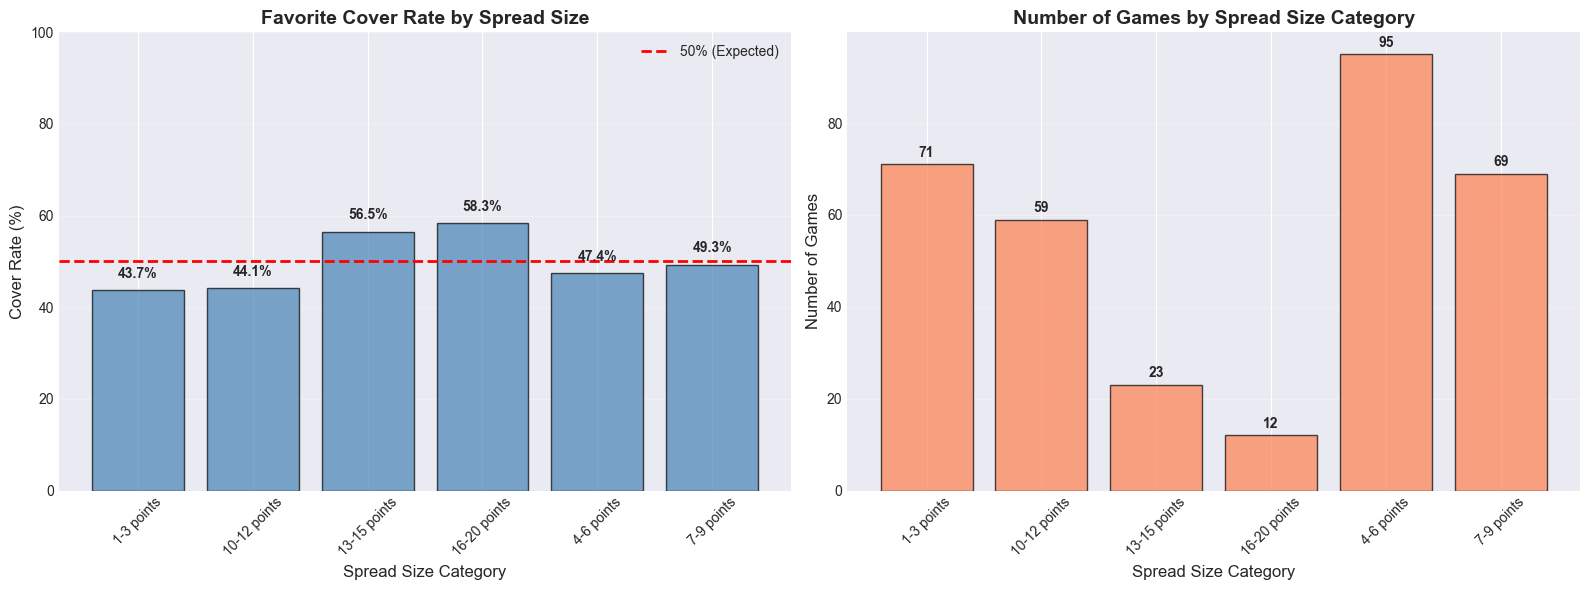

Cover Rate by Individual Spread Value (min 3 games):
              Total Games  Covered  Did Not Cover  Cover Rate %  \
spread_exact                                                      
-16.5                   4        3              1          75.0   
-15.5                   5        4              1          80.0   
-14.5                   3        1              2          33.3   
-13.5                   5        3              2          60.0   
-12.5                   8        4              4          50.0   
-11.5                   8        3              5          37.5   
-11.0                   3        0              3           0.0   
-10.5                  10        3              7          30.0   
-9.5                   13        7              6          53.8   
-8.5                   14        7              7          50.0   
-7.5                   15        6              9          40.0   
-6.5                   15        8              7          53.3   
-5.5     